# synthetic-data-gen

## Generating synthetic data for the experiments

In this Notebook, let us generate the 4 synthetic datasets proposed to experiment with hyperparameter optimzation and t-SNE. A description of the datasets follows:

1. **Well-separated clusters, different distances** to test how much a tuned t-SNE can preserve global structure.
2. **Well-separated clusters, different distances with noise** to check the effect of noise on preserving global structure.
3. **Gaussian noise:** to test if a tuned t-SNE would reproduce noise in the high-dimensional space as noise in the low-dimensional manifold.
4. **Two gaussian distributions with different densities**, both centered at the origin but with very different standard deviations, to test tuning for topology.

In the following sections, we generate the data.

## Tools & Libraries

We use **`Python`**. The following modules are used:

* **pandas:** reading, writing and manipulating data.
* **numpy:** vectorized calculations and other relevant math functions.
* **scipy:** functions for scientific purposes. Great statistics content.
* **matplotlib & seaborn:** data visualization.
* **sklearn:** comprehensive machine learning libraries.

In [1]:
# opening up a console as the notebook starts
%qtconsole

# making plots stay on the notebook (no extra windows!)
%matplotlib inline

# show figures with highest resolution 
%config InlineBackend.figure_format = 'retina'

# changing working directory
import os
os.chdir('C:\\Users\\Guilherme\\Documents\\TCC\\tsne-optim')

# importing modules
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Well-separated clusters, different distances

Let us create a set of high-dimensional gaussian distribuited clusters, separated by different distances. For simpçlicity, let us restrict cluster centers to be in the unit hypercube.

### 1.1 Cluster centers

Let us start by generating the centers.

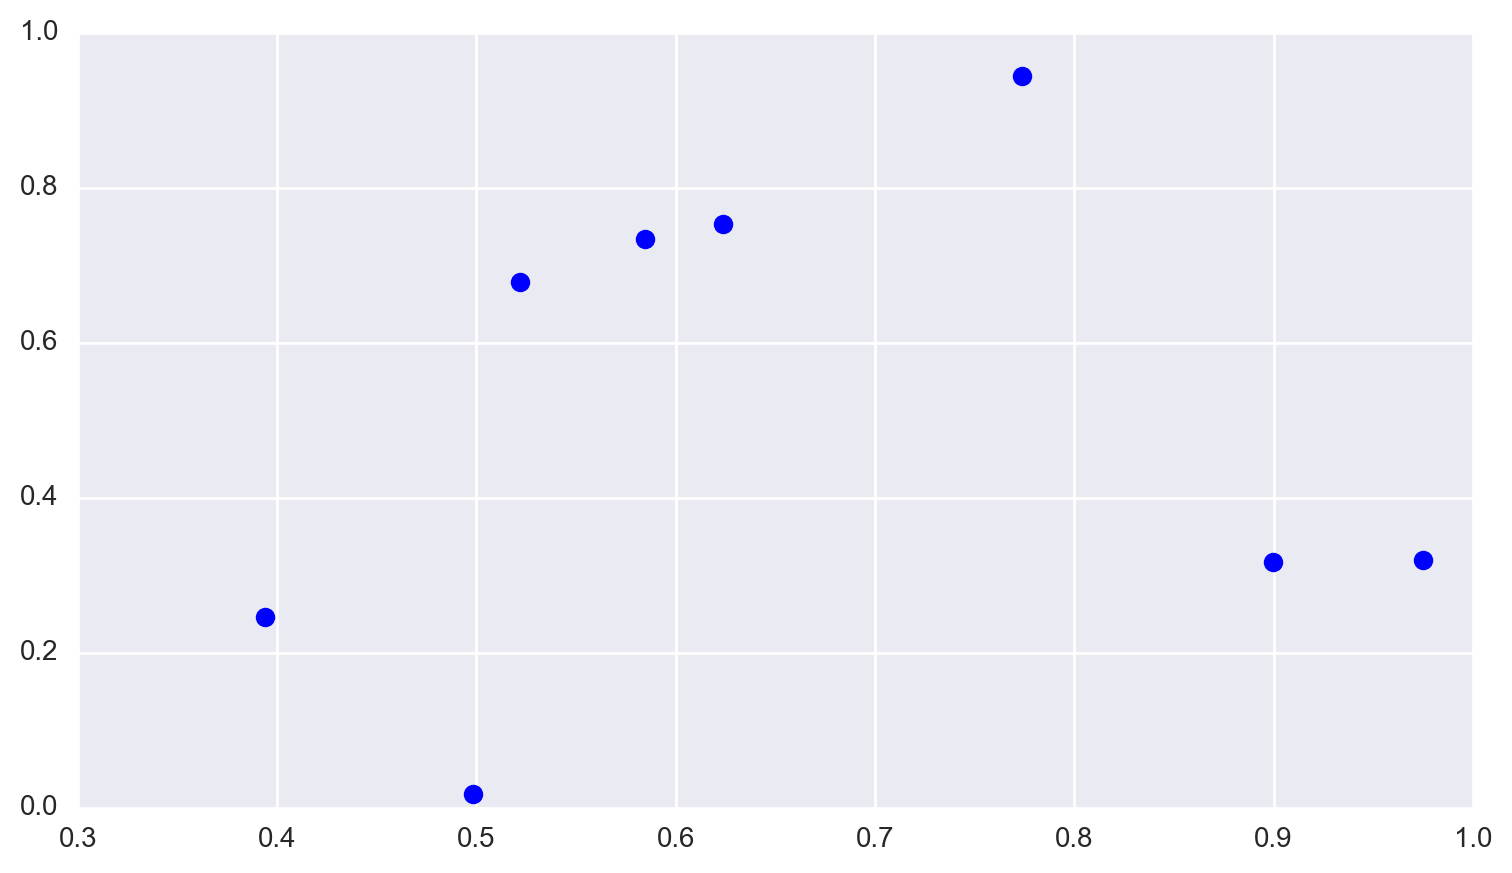

In [2]:
# positioning cluster centers #

# number of clusters
n_clusters = 8

# number of dimensions
n_dims = 500

# sampling n_clusters points of n_dims
centers = [np.random.random_sample(size=n_dims) for i in range(n_clusters)]

# plotting position of centers (first two dims)
plt.figure(figsize=[9,5])
plt.plot([e[0] for e in centers], [e[1] for e in centers], 'bo')

### 1.2 Distances

Let us examine distances among clusters. 

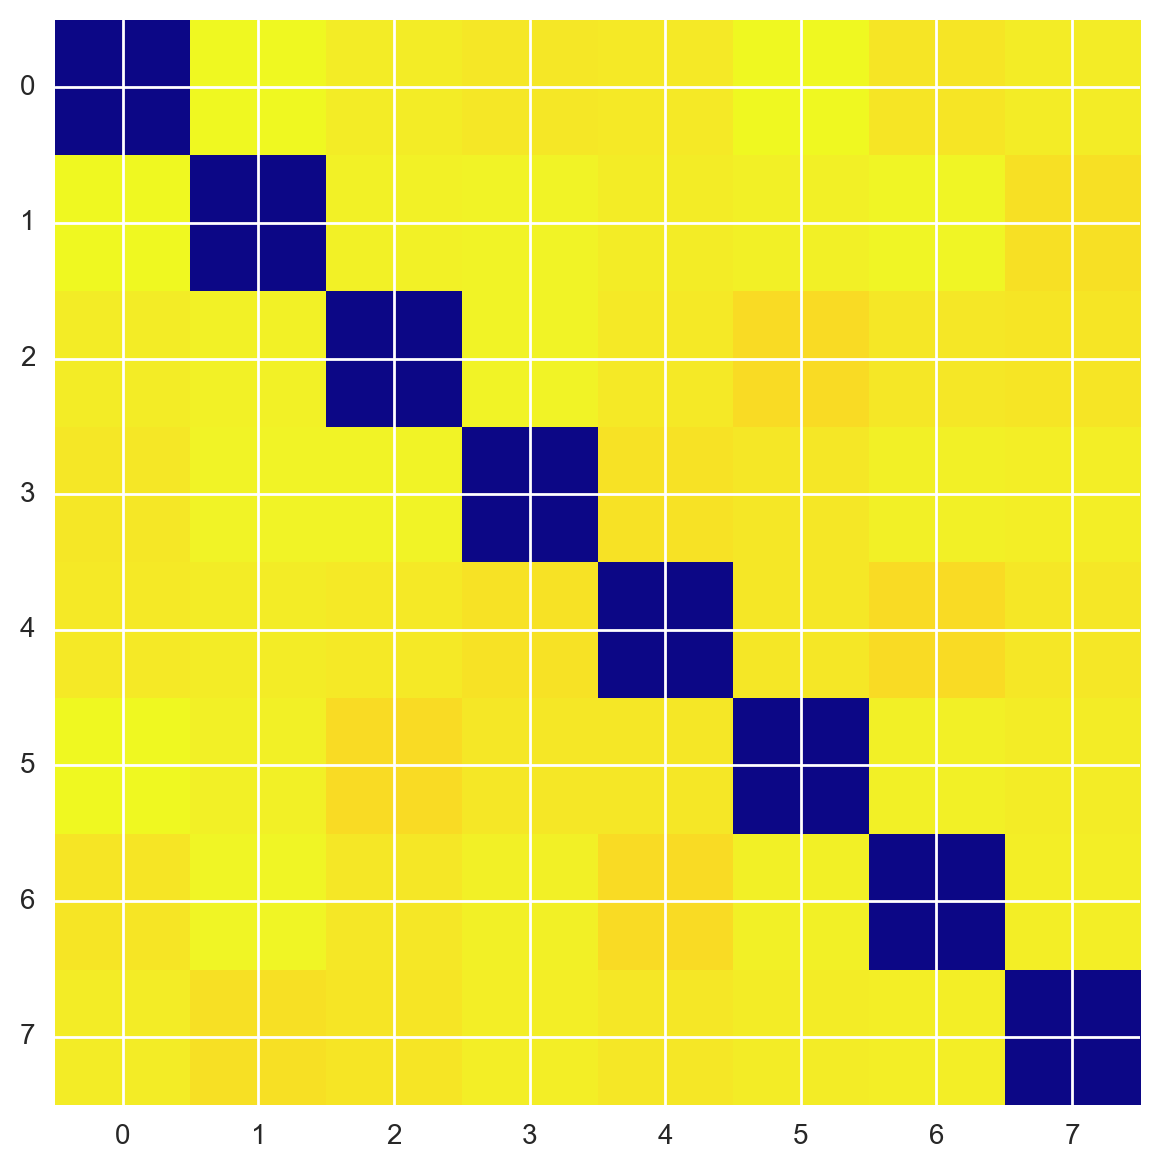

In [3]:
# let us create a distance matrix #

# we can do this with sklearn
from sklearn.metrics.pairwise import euclidean_distances
d_matrix = euclidean_distances(np.matrix(centers))

# let us observe
plt.figure(figsize=[7,7])
plt.imshow(d_matrix, cmap='plasma', interpolation='nearest')

In [4]:
# let us compute which clusters are closest to each other #

# argsort tells us which are the closest clusters
closest = [np.argsort(d_matrix[:,i])[1:] for i in range(d_matrix.shape[0])]

# assembling dataframe from list of closest
closest_df = pd.DataFrame(np.matrix(closest)).transpose()

# observing
closest_df

,0,1,2,3,4,5,6,7
0,6,7,5,4,6,2,4,1
1,3,4,7,5,3,4,0,2
2,4,5,6,0,7,3,2,4
3,2,2,4,7,5,7,7,5
4,7,3,0,6,0,6,3,0
5,5,6,1,1,2,1,5,3
6,1,0,3,2,1,0,1,6


### 1.3 Generating new points

Let us generate new points by adding gaussian noise to the centers.

In [5]:
# generating new points #

# list to store new points
new_points = []

# list to store target values
target = []

# deviation of gaussian noise
std = 0.0025

# loop over centers
for i, center in enumerate(centers):
    
    # number of points to generate
    n_points = np.random.choice(range(50,100),size=1)[0]
    
    # generating samples for this center
    samples = np.random.multivariate_normal(center, np.diag([std]*len(center)), size=n_points)
    
    # storing in list
    new_points.extend(samples)
    target.extend([i]*n_points)

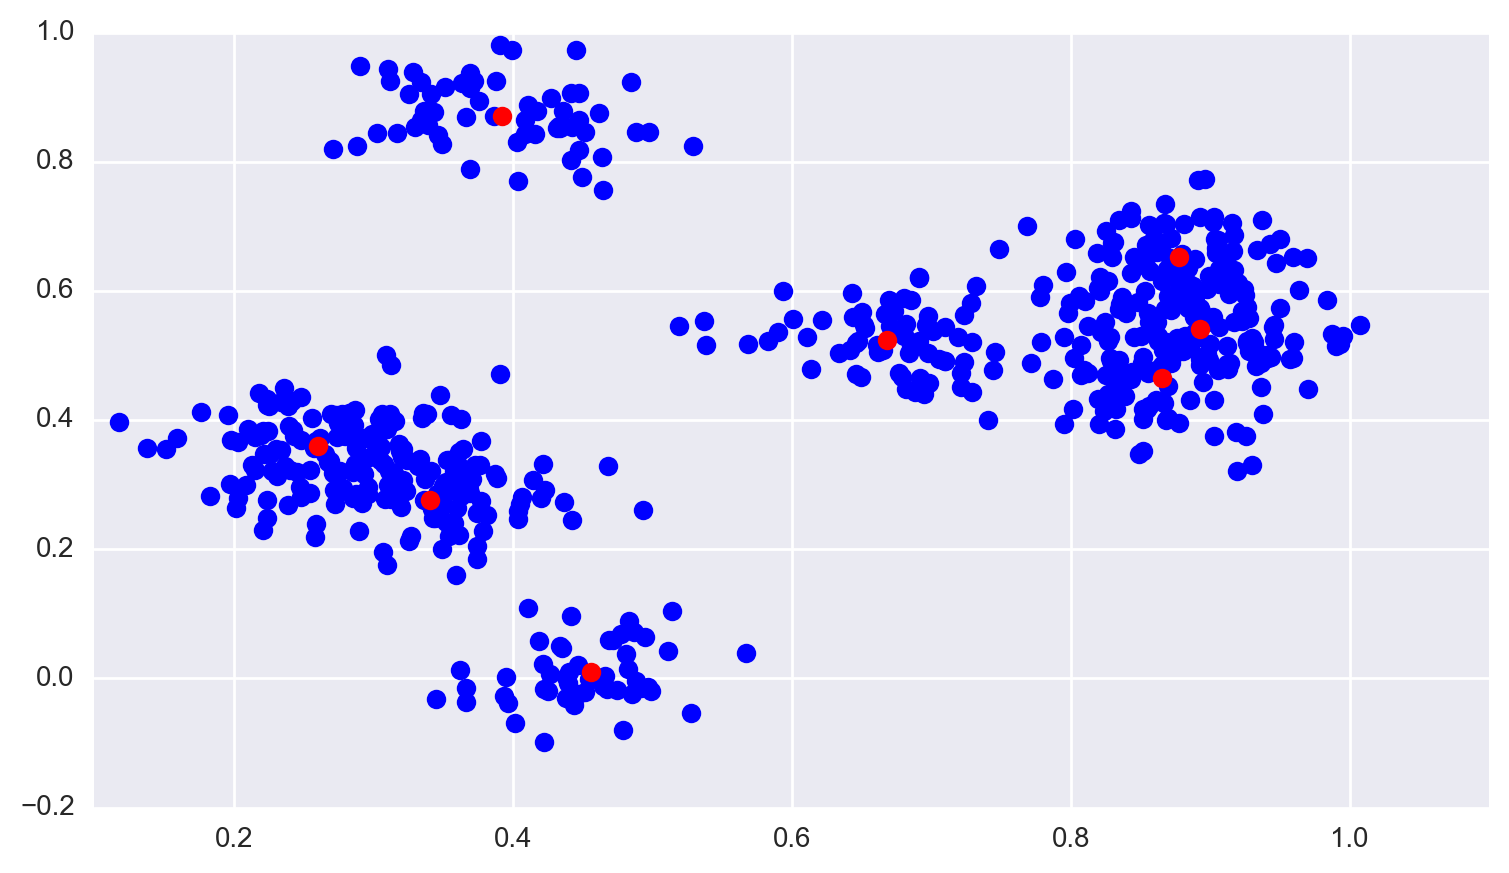

In [6]:
# checking the result #

# dimension
k = 2

# plotting new points
fig = plt.figure(figsize=[9,5])
plt.plot([e[k] for e in new_points], [e[k+1] for e in new_points], 'bo')
plt.plot([e[k] for e in centers], [e[k+1] for e in centers], 'ro')
fig.savefig('vis/well-sep-example.png')

## 1.4 Exporting data

Let us export the generated data in a structured format.

In [7]:
# let us create pandas dataframes from the generated data #

# centers
centers_df = pd.DataFrame(np.matrix(centers))
centers_df.columns = ['feat_' + str(e) for e in centers_df.columns]

# new points
points_df = pd.DataFrame(np.matrix(new_points))
points_df.columns = ['feat_' + str(e) for e in points_df.columns]
points_df.loc[:,'TARGET'] = target

In [8]:
# checking results
centers_df

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_490,feat_491,feat_492,feat_493,feat_494,feat_495,feat_496,feat_497,feat_498,feat_499
0,0.975004,0.320042,0.865499,0.465673,0.181236,0.957762,0.793397,0.412196,0.201881,0.902450,...,0.941690,0.126405,0.175429,0.285996,0.641596,0.169199,0.926203,0.614976,0.563130,0.457417
1,0.393765,0.245670,0.392748,0.870246,0.499087,0.177392,0.433859,0.954553,0.972303,0.279530,...,0.147195,0.670876,0.872113,0.109588,0.147623,0.327028,0.468782,0.014594,0.664177,0.190736
2,0.522083,0.677492,0.668744,0.523699,0.553337,0.436973,0.362579,0.684154,0.758894,0.361319,...,0.017459,0.012000,0.255074,0.245361,0.501693,0.484421,0.653686,0.854634,0.477239,0.139043
3,0.498482,0.016912,0.892618,0.541066,0.807952,0.755785,0.247180,0.583726,0.350848,0.930076,...,0.474280,0.492069,0.988128,0.142192,0.183007,0.781863,0.466712,0.019382,0.050828,0.521180
4,0.623910,0.752671,0.456450,0.009153,0.594940,0.291505,0.368671,0.554201,0.060455,0.084198,...,0.344119,0.709796,0.120941,0.345119,0.798274,0.598070,0.408256,0.783082,0.936362,0.553778
5,0.899844,0.317304,0.260669,0.360124,0.060713,0.061643,0.002881,0.140925,0.170656,0.209682,...,0.816294,0.005276,0.052144,0.007921,0.300569,0.876485,0.349118,0.707408,0.473079,0.507687
6,0.773571,0.943566,0.340706,0.276036,0.525873,0.823897,0.454695,0.217546,0.185582,0.822943,...,0.739310,0.027118,0.085160,0.722388,0.493787,0.286082,0.077005,0.209143,0.223550,0.108208
7,0.584455,0.734229,0.877393,0.652407,0.642137,0.593521,0.921589,0.452181,0.893853,0.247164,...,0.300094,0.157396,0.462566,0.145203,0.691691,0.325003,0.809892,0.418499,0.965007,0.060400


In [9]:
# checking results
points_df.head(10)

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_491,feat_492,feat_493,feat_494,feat_495,feat_496,feat_497,feat_498,feat_499,TARGET
0,0.883483,0.304301,0.917495,0.552299,0.094365,0.965112,0.778914,0.481244,0.154229,0.904446,...,0.045821,0.075176,0.326948,0.631015,0.216379,0.817296,0.651541,0.574349,0.505037,0
1,1.036821,0.268124,0.812771,0.545749,0.143940,0.990039,0.761059,0.417568,0.217695,0.954883,...,0.089590,0.182354,0.266274,0.622530,0.223936,0.942042,0.711632,0.592936,0.447481,0
2,0.984281,0.338512,0.824698,0.551406,0.308479,1.010322,0.743410,0.397147,0.207985,0.933770,...,0.130454,0.146020,0.288868,0.628995,0.165090,0.852525,0.604768,0.527544,0.511004,0
3,1.061342,0.357207,0.830611,0.464947,0.123681,0.977802,0.897806,0.494009,0.216467,0.880622,...,0.195005,0.182262,0.276178,0.647737,0.160238,0.910304,0.543111,0.481709,0.492650,0
4,0.948406,0.324963,0.898963,0.492991,0.190190,0.948895,0.856655,0.416499,0.198090,0.868637,...,0.121663,0.183311,0.253820,0.790489,0.174980,0.929428,0.576609,0.563030,0.409731,0
5,0.938211,0.378551,0.906012,0.477585,0.167918,0.974839,0.761391,0.420527,0.192930,0.936340,...,0.095049,0.151617,0.278415,0.632516,0.222587,0.970212,0.557786,0.574320,0.451706,0
6,0.997974,0.274358,0.834537,0.438539,0.177350,0.905942,0.779999,0.406576,0.172794,0.821924,...,0.081466,0.230075,0.260955,0.606204,0.240976,0.945733,0.624296,0.552058,0.553525,0
7,1.033664,0.369919,0.893020,0.494148,0.134261,0.933653,0.822084,0.387639,0.191306,0.846045,...,0.093212,0.146627,0.305462,0.705615,0.190028,1.029679,0.605192,0.482939,0.462418,0
8,1.026222,0.365714,0.929837,0.526902,0.145227,0.925067,0.850198,0.413768,0.134991,0.824582,...,-0.016010,0.239417,0.202872,0.616069,0.254783,0.909262,0.710810,0.556738,0.383233,0
9,0.875828,0.367588,0.826705,0.440075,0.133383,0.865721,0.810005,0.366284,0.243327,0.868762,...,0.055929,0.163098,0.320732,0.550289,0.175661,0.891984,0.601549,0.543812,0.458234,0


In [10]:
# let us save the data #

# centers
centers_df.to_csv('data/final/well-sep-centers.csv', index=False)

# points
points_df.to_csv('data/final/well-sep.csv', index=False)

# closest clusters
closest_df.to_csv('data/final/well-sep-closest.csv', index=False)

Ok! Let us move on to other synthetic dataset: Well separated clusters with noise.

## 2. Well-separated clusters, different distances with noise

Let us add uniform noise to the dataset generated in (1).

In [11]:
# let us create a dataframe of noise #

# noise sampling boundaries: max and min of whole points dataframe
upper_bound = np.max(np.max(points_df.iloc[:,0:-1]))
lower_bound = np.min(np.min(points_df))

# let us check these bounds
print upper_bound, lower_bound

# number of noise points as a proportion of non noise
n_noise = int(round(0.33 * points_df.shape[0]))
print 'Number of noisy points:', n_noise

# uniform sampling of bounds
points_noisy = [np.random.uniform(low=lower_bound, high=upper_bound, size=points_df.shape[1]-1) for i in range(n_noise)]

1.18225808893 -0.175946365925
Number of noisy points: 198


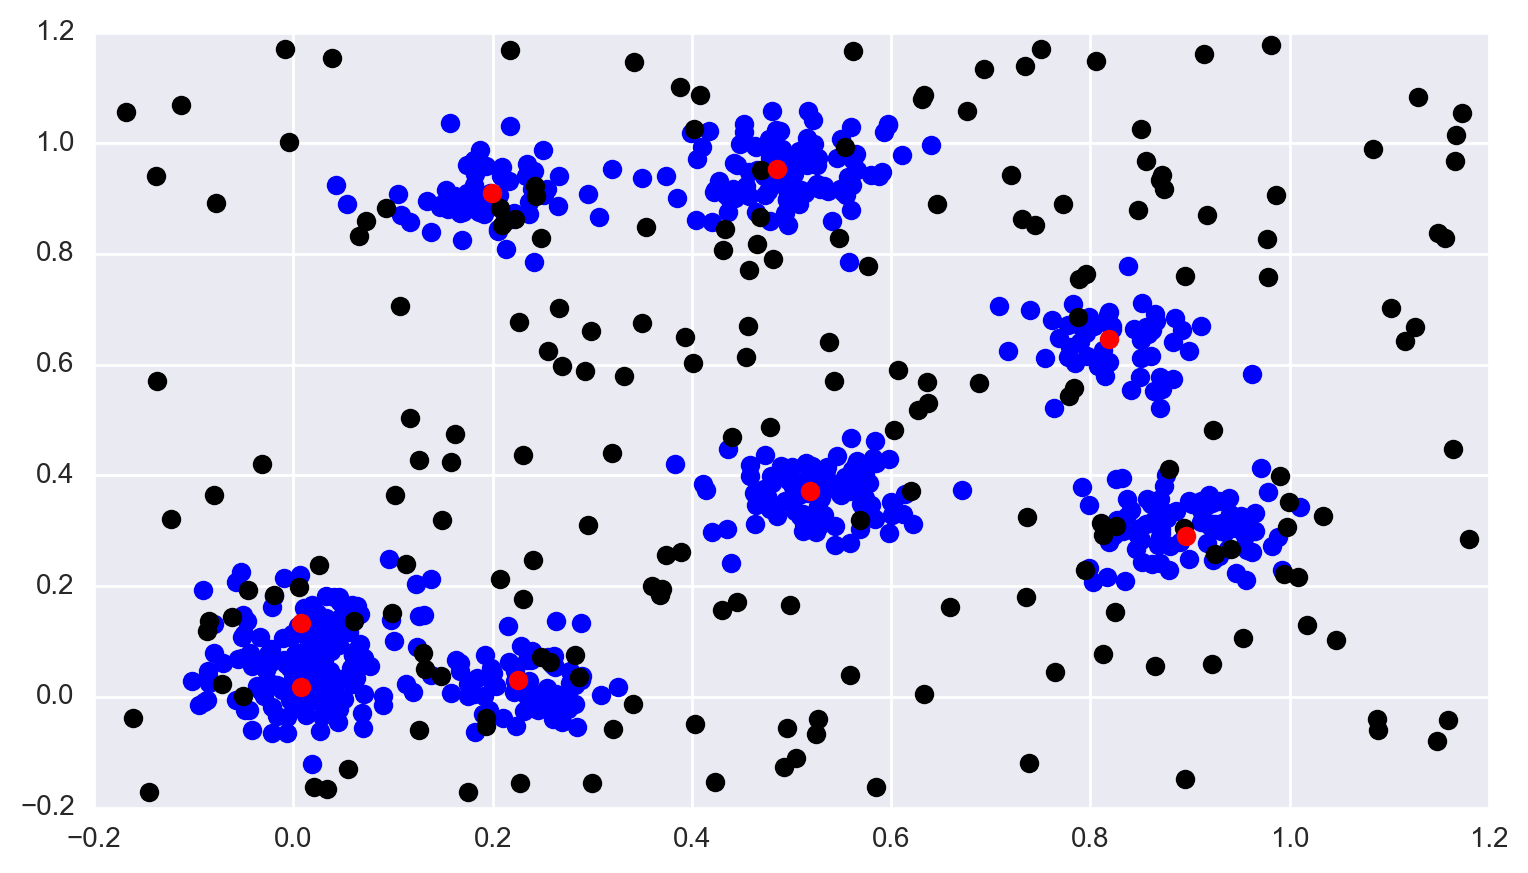

In [12]:
# let us visualize noisy points #

# dimension
k = 10

# plotting new points
fig = plt.figure(figsize=[9,5])
plt.plot([e[k] for e in new_points], [e[k+1] for e in new_points], 'bo')
plt.plot([e[k] for e in points_noisy], [e[k+1] for e in points_noisy], 'ko')
plt.plot([e[k] for e in centers], [e[k+1] for e in centers], 'ro')
fig.savefig('vis/well-sep-noise-example.png')

Great, we've got our noisy points. Now we just create a data frame from them and add it to the points data frame.

In [13]:
# creating noisy points data frame #

# as pandas DataFrame
noisy_df = pd.DataFrame(np.matrix(points_noisy))
noisy_df.columns =  ['feat_' + str(e) for e in noisy_df.columns]

In [14]:
# observing
noisy_df.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_490,feat_491,feat_492,feat_493,feat_494,feat_495,feat_496,feat_497,feat_498,feat_499
0,0.163210,0.892577,0.305993,0.267964,0.826173,0.089486,-0.080470,1.062006,0.128673,0.914576,...,1.001207,1.158147,0.850818,0.747583,0.307365,0.838646,0.443302,0.975561,0.732123,-0.092202
1,0.843464,0.647752,0.522353,0.450739,0.031594,0.159562,0.821488,0.878582,0.073869,0.764115,...,1.051963,0.328648,0.162660,-0.156985,0.677948,0.703053,0.646037,0.667830,0.831002,1.029722
2,0.482697,0.065600,-0.167282,0.175692,0.986155,0.609406,0.001809,0.046111,1.042045,0.604107,...,0.889850,0.131747,1.128670,0.586584,0.282948,0.107409,0.739190,0.904031,0.659178,0.119381
3,-0.099247,0.724513,0.080390,0.522218,0.058286,0.157873,0.333304,0.124013,0.761364,0.190506,...,0.373743,1.054864,1.149711,0.341713,0.318749,0.933456,0.042332,0.672666,0.028416,0.266441
4,0.273453,0.643547,0.816767,0.457173,0.900768,0.486663,0.334553,0.928762,0.716762,0.763104,...,0.388264,0.284940,0.795191,0.716247,0.163085,0.365611,-0.037363,-0.043849,0.506560,1.057896


In [15]:
# let us save the data #

# first, let us add a column to identify the dataset the points come from: noisy or not
noisy_df.loc[:,'TARGET'] = max(points_df['TARGET']) + 1

# and then, join these df's and save
points_noisy_df = pd.concat([points_df, noisy_df])
points_noisy_df.to_csv('data/final/well-sep-noise.csv', index=False)

## 3. Gaussian noise

Let us generate high dimensional gaussian noise centered at the origin.

In [16]:
# parameters of generation #

# number of points
n_points = 500

# deviation of distribution
std = 2

# number of dimensions
n_dim = 200

In [17]:
# generating points #
points_gnoise = np.random.multivariate_normal([0]*n_dim, np.diag([std]*n_dim), size=n_points)

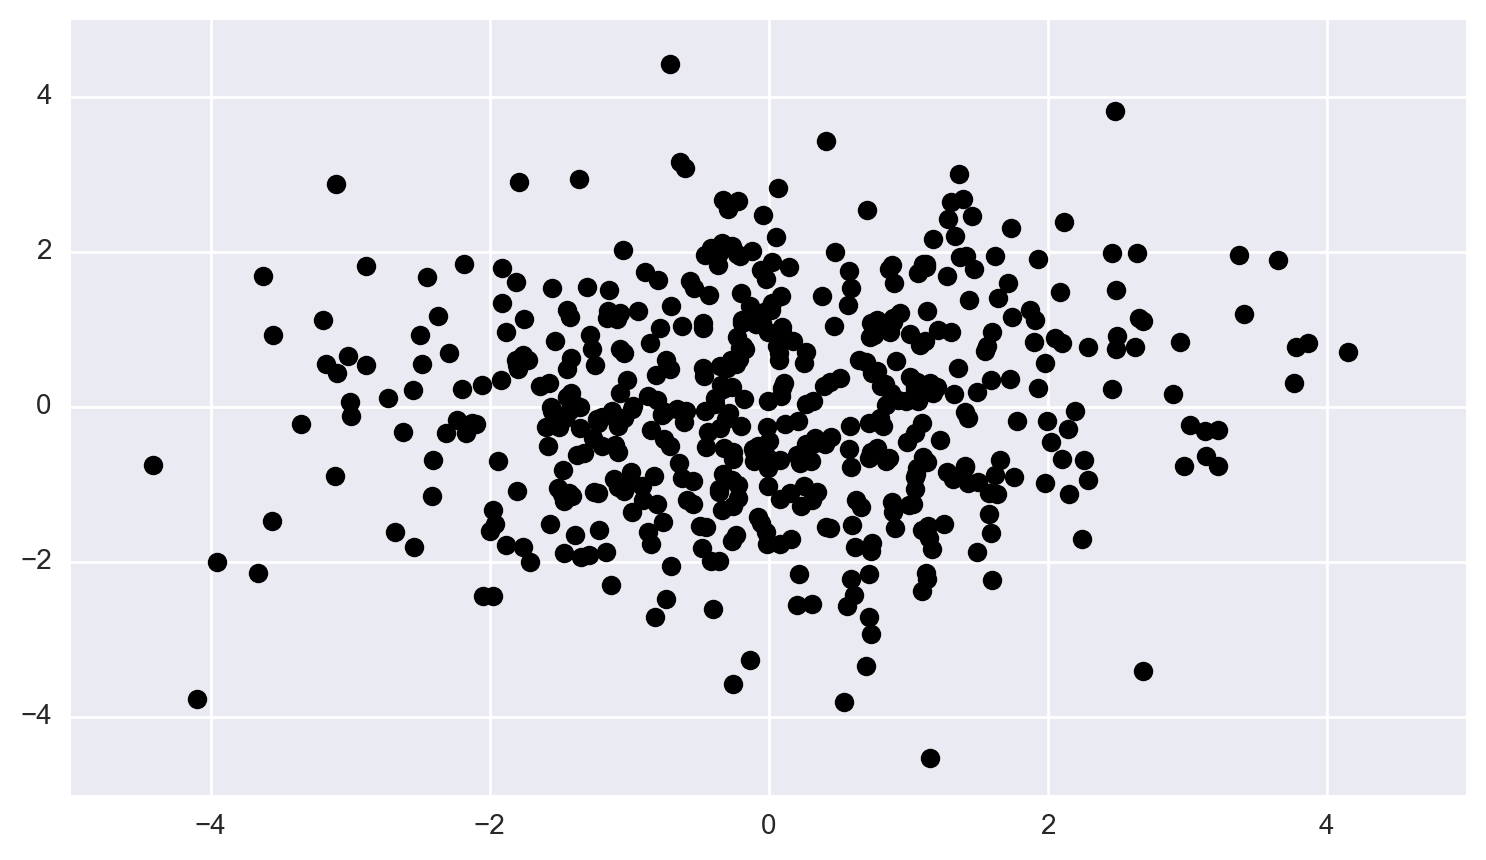

In [18]:
# plotting #
k = 0
fig = plt.figure(figsize=[9,5])
plt.plot([e[k] for e in points_gnoise], [e[k+1] for e in points_gnoise], 'ko')
fig.savefig('vis/gaussian-noise-example.png')

In [19]:
# defining pandas dataframe for these points #

# creating df and renaming columns
gnoise_df = pd.DataFrame(np.matrix(points_gnoise))
gnoise_df.columns = ['feat_' + str(e) for e in gnoise_df.columns]

# adding target for standardization reasons
gnoise_df.loc[:,'TARGET'] = 0

In [20]:
# observing
gnoise_df.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_191,feat_192,feat_193,feat_194,feat_195,feat_196,feat_197,feat_198,feat_199,TARGET
0,0.297288,-0.480207,0.635372,0.080513,-0.086390,0.433050,1.369205,0.422638,0.519042,1.263586,...,-0.306159,-0.137371,0.530681,-0.589228,-3.954679,1.823204,0.119005,-1.423863,-0.173841,0
1,-0.594293,-0.054891,-1.598805,0.217147,-1.237403,-0.280351,-1.422926,-1.174358,1.769092,-0.817947,...,-1.748552,0.814333,-0.057903,-2.688880,-1.066655,-1.413876,-0.128295,-2.488440,1.356938,0
2,-1.551087,-0.053182,-2.702478,0.508828,0.553796,0.230190,-1.326557,0.837284,1.491792,1.179076,...,0.188837,-4.443885,-1.549710,1.690849,1.115628,2.346689,-0.313574,0.258077,-0.609502,0
3,0.270613,0.716064,-0.538627,0.983497,3.345169,1.308179,2.088501,0.864214,-1.102306,0.958675,...,0.070635,3.431183,0.558253,1.716773,0.484793,1.099494,-0.162455,-2.644001,2.119041,0
4,-1.290692,-1.907259,-0.278018,-1.004199,-1.651353,0.228234,-0.978104,-1.517942,2.691555,-1.618175,...,2.179428,0.741975,-0.233887,-1.504438,0.111271,1.209328,1.570001,-0.437180,-0.041705,0


In [21]:
# saving
gnoise_df.to_csv('data/final/gaussian-noise.csv', index=False)

## 4. Two gaussian distributions with different densities

Let us create the final synthetic dataset: two gaussian distributions with diferent densities. We aim to use this dataset to test tuning t-SNE for topology.

In [22]:
# parameters of generation #

# number of points
n_points_1 = 250
n_points_2 = 500

# deviation of distribution
from __future__ import division
std_1 = 2
std_2 = std_1/2000

# number of dimensions
n_dim = 1000

In [23]:
# generating points #
points_1 = np.random.multivariate_normal([0]*n_dim, np.diag([std_1]*n_dim), size=n_points_1)
points_2 = np.random.multivariate_normal([0]*n_dim, np.diag([std_2]*n_dim), size=n_points_2)

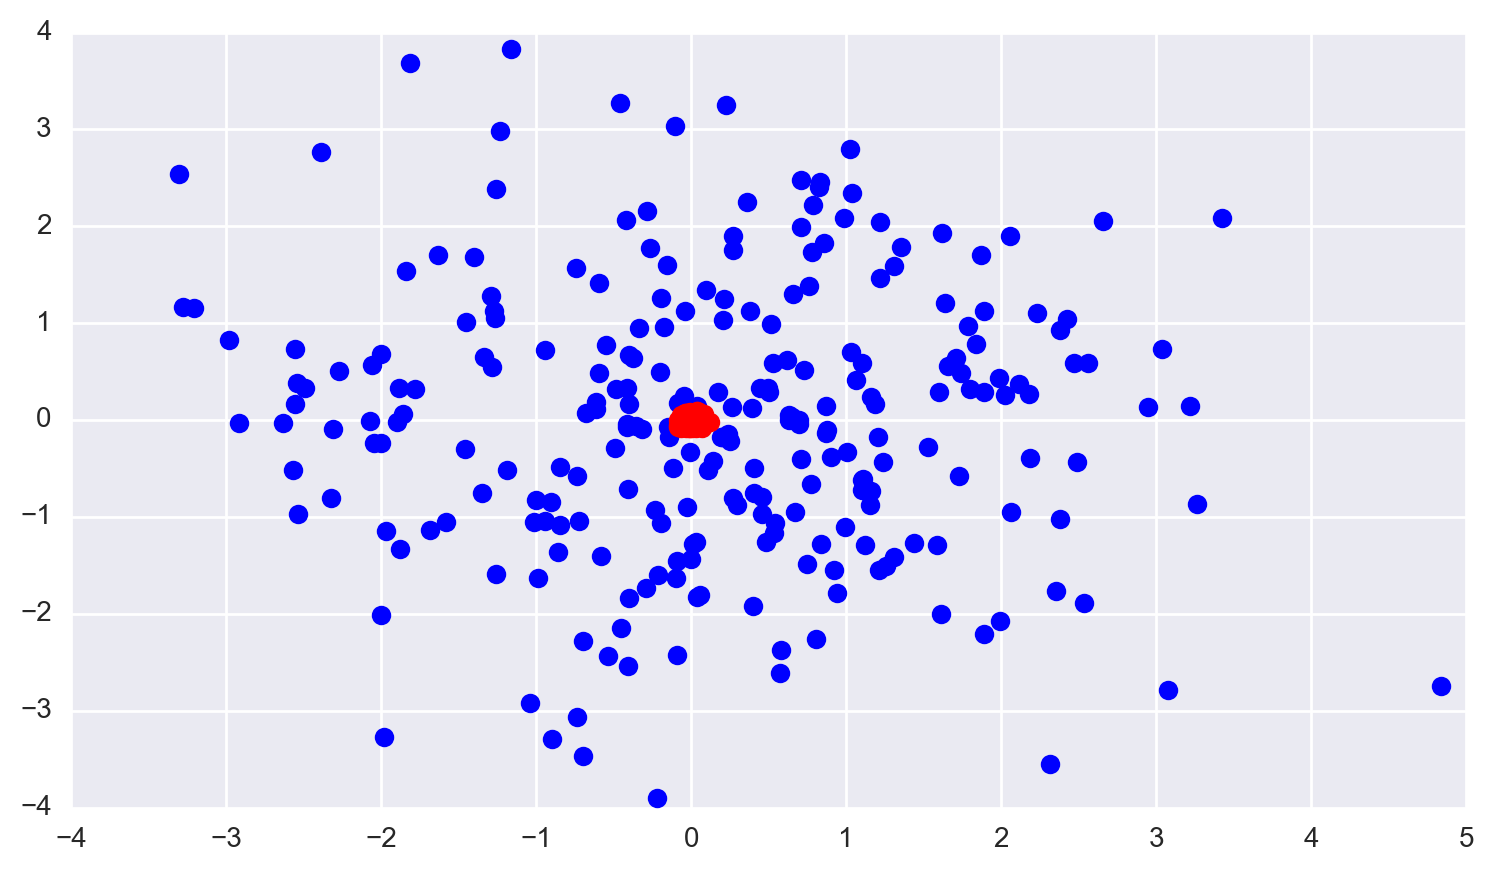

In [24]:
# plotting #
k = 0
fig = plt.figure(figsize=[9,5])
plt.plot([e[k] for e in points_1], [e[k+1] for e in points_1], 'bo')
plt.plot([e[k] for e in points_2], [e[k+1] for e in points_2], 'ro')
fig.savefig('vis/topology-example.png')

In [25]:
# defining pandas dataframe for these points #

# creating df and renaming columns - sparse dataset
top_df_1 = pd.DataFrame(np.matrix(points_1))
top_df_1.columns = ['feat_' + str(e) for e in top_df_1.columns]
top_df_1.loc[:,'TARGET'] = 0

# creating df and renaming columns - dense dataset
top_df_2 = pd.DataFrame(np.matrix(points_2))
top_df_2.columns = ['feat_' + str(e) for e in top_df_2.columns]
top_df_2.loc[:,'TARGET'] = 1

# joining datasets
topology_final = pd.concat([top_df_1, top_df_2])

In [26]:
# saving data
topology_final.to_csv('data/final/topology.csv', index=False)